# 고객 신용 예측

## 1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
credit_customers= pd.read_csv('./data/credit_customers.csv')

In [4]:
pd.options.display.max_columns = None # 모든 열이 다 보이게 설정 
credit_customers.head() # column명 변경 불필요

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## 2. 데이터 전처리

In [6]:
credit_customers.shape

(1000, 21)

In [7]:
credit_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### 2-1. 결측치 제거

In [8]:
credit_customers.isnull().sum() # 결측치 존재하지 않음

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### 2-2. 이상치 탐지

In [10]:
credit_customers.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline

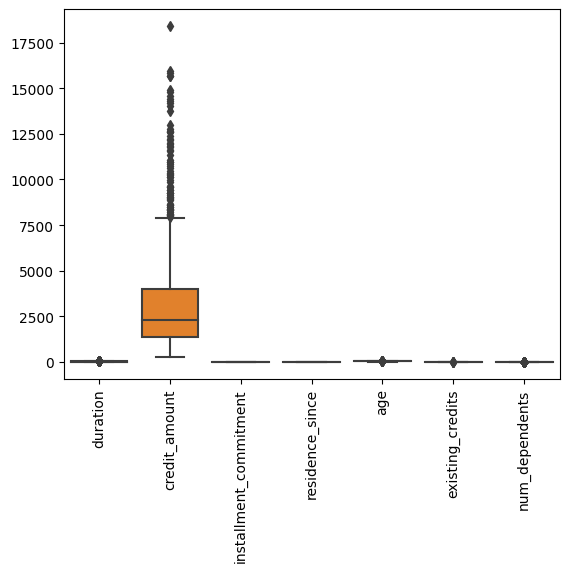

In [14]:
plt.xticks(rotation=90)
bplot = sns.boxplot(data=credit_customers) # credit_amount에 매우 큰 이상치 몰려있음

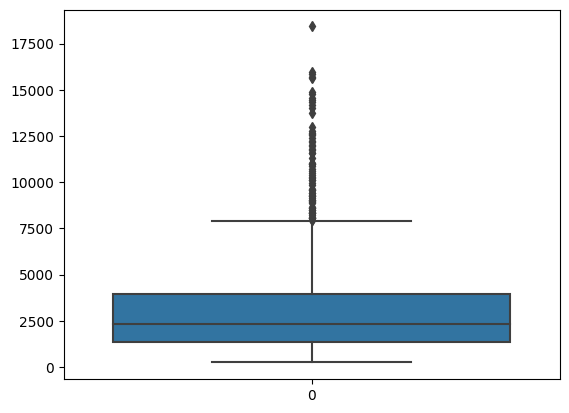

In [19]:
bplot= sns.boxplot(data= credit_customers['credit_amount'])

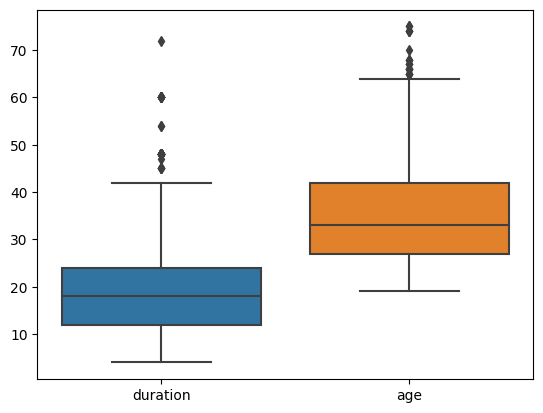

In [16]:
bplot= sns.boxplot(data= credit_customers[['duration', 'age']])

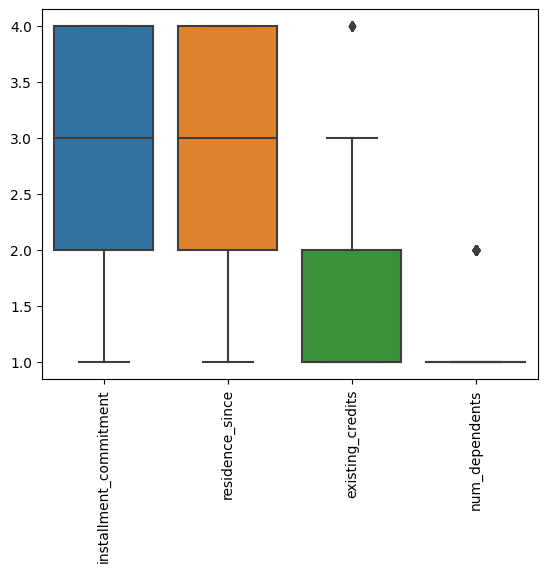

In [18]:
plt.xticks(rotation=90)
bplot= sns.boxplot(data= credit_customers[['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']])

### 2-3. 이상치 제거
- 거래내역으로 본다면 credit_amount의 이상치가 중요할 수도 있으나 일단은 이상치를 제거하고 분석 진행

In [20]:
import numpy as np

In [21]:
def get_outlier(df=None, column=None, weight=1.5):
    q25 = np.percentile(df[column].values, 25)
    q75 = np.percentile(df[column].values, 75)
    
    IQR = q75-q25
    IQR_weight = IQR * weight
    
    lowest = q25 - IQR_weight
    highest = q75 + IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest)|(df[column]>highest)].index
    
    return outlier_idx

In [22]:
column_outlier_idx = get_outlier(df=credit_customers, column='credit_amount')
credit_customers.drop(column_outlier_idx, inplace=True)

## 3. 탐색적 자료분석(EDA)

In [23]:
credit_customers.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### 3-1. 범주형

Text(0.5, 1.0, 'checking_status')

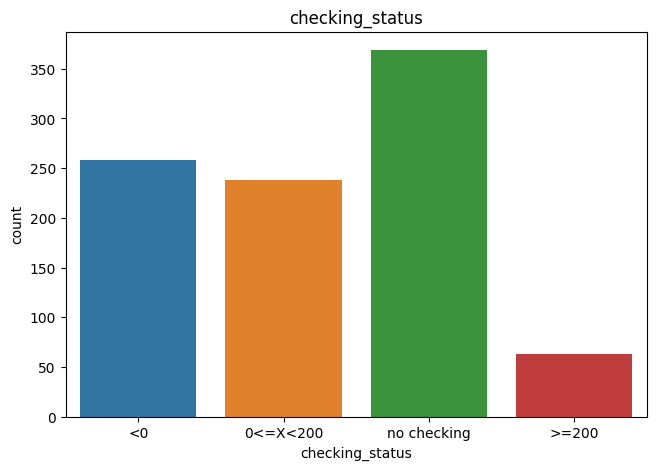

In [25]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'checking_status', data = credit_customers)
plt.title('checking_status')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'critical/other existing credit'),
  Text(1, 0, 'existing paid'),
  Text(2, 0, 'delayed previously'),
  Text(3, 0, 'no credits/all paid'),
  Text(4, 0, 'all paid')])

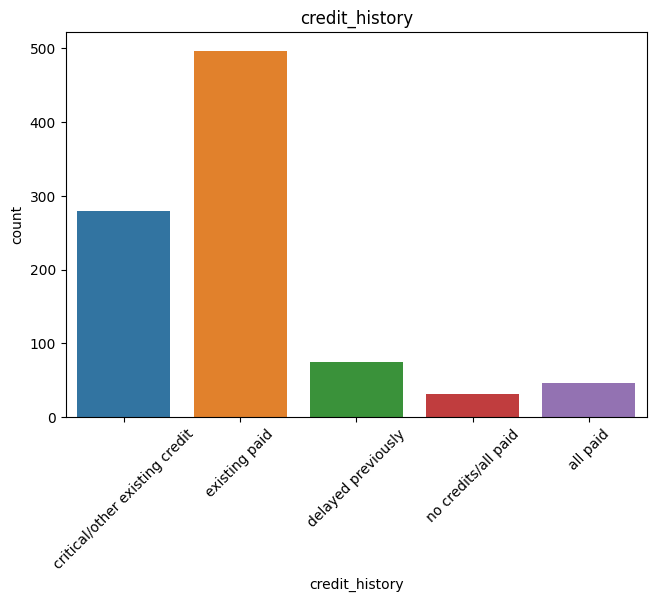

In [29]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'credit_history', data = credit_customers)
plt.title('credit_history')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radio/tv'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'new car'),
  Text(4, 0, 'used car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'domestic appliance'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'retraining')])

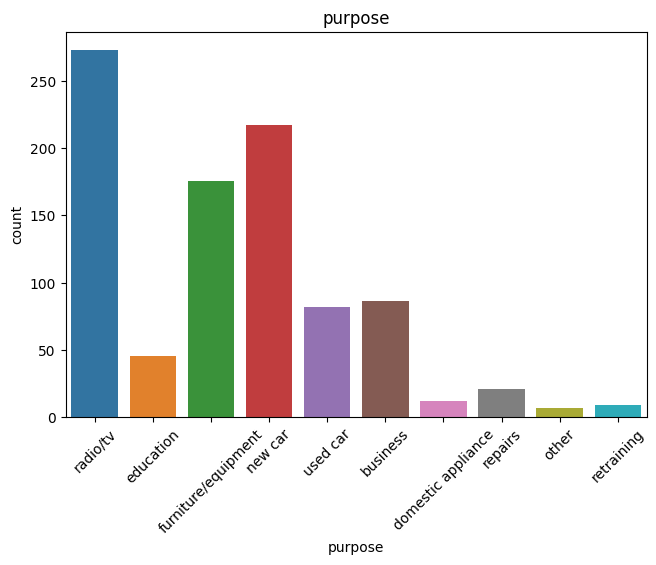

In [30]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'purpose', data = credit_customers)
plt.title('purpose')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'savings_status')

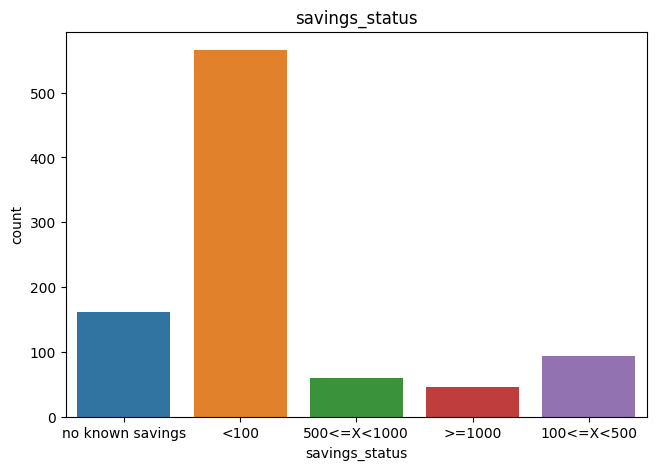

In [31]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'savings_status', data = credit_customers)
plt.title('savings_status')

Text(0.5, 1.0, 'employment')

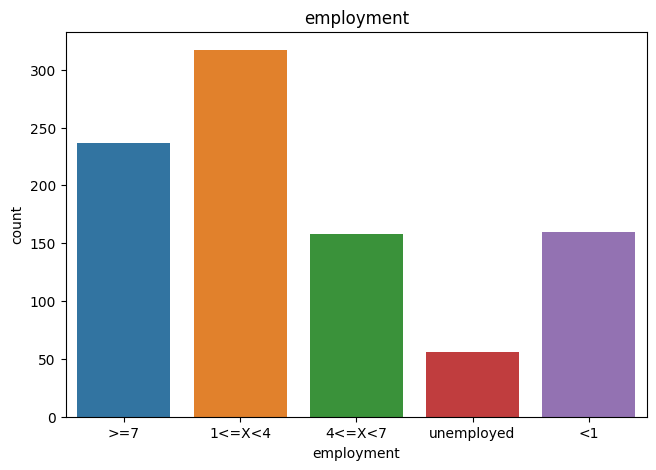

In [32]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'employment', data = credit_customers)
plt.title('employment')

Text(0.5, 1.0, 'personal_status')

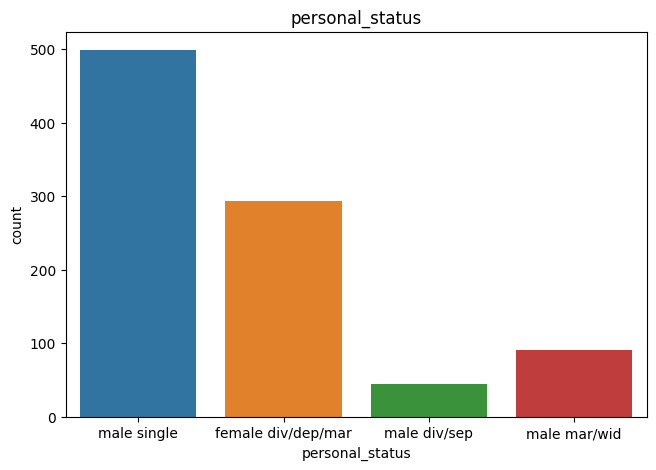

In [33]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'personal_status', data = credit_customers)
plt.title('personal_status')

Text(0.5, 1.0, 'other_parties')

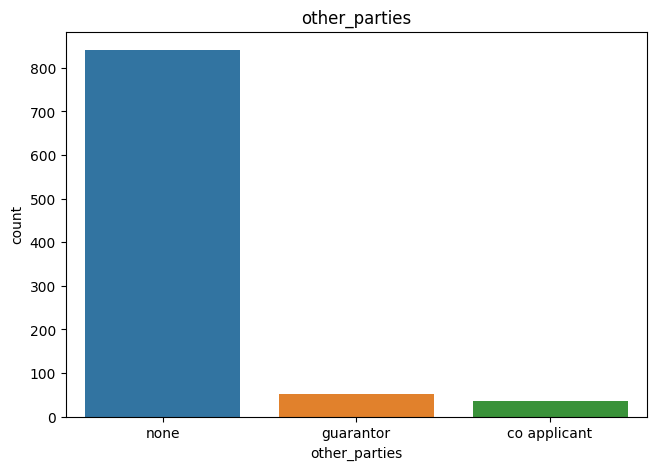

In [34]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'other_parties', data = credit_customers)
plt.title('other_parties')

Text(0.5, 1.0, 'property_magnitude')

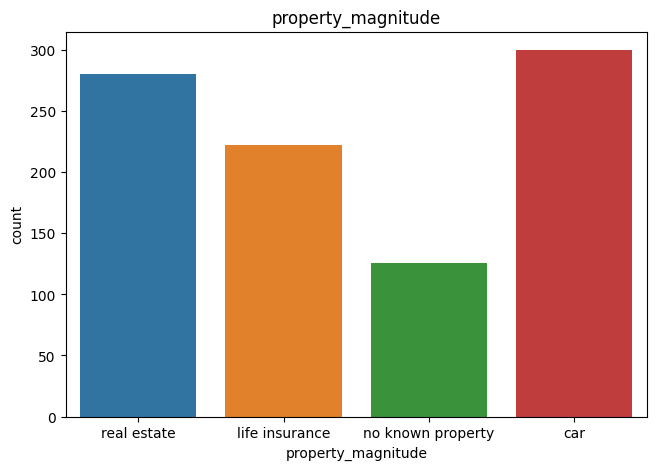

In [35]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'property_magnitude', data = credit_customers)
plt.title('property_magnitude')

Text(0.5, 1.0, 'other_payment_plans')

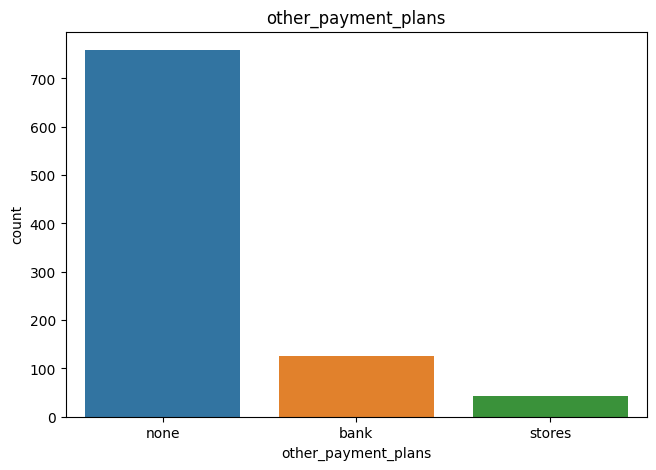

In [36]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'other_payment_plans', data = credit_customers)
plt.title('other_payment_plans')

Text(0.5, 1.0, 'housing')

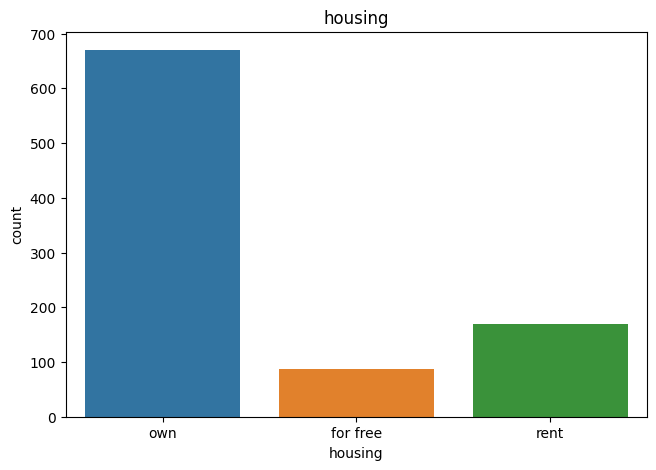

In [37]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'housing', data = credit_customers)
plt.title('housing')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'skilled'),
  Text(1, 0, 'unskilled resident'),
  Text(2, 0, 'high qualif/self emp/mgmt'),
  Text(3, 0, 'unemp/unskilled non res')])

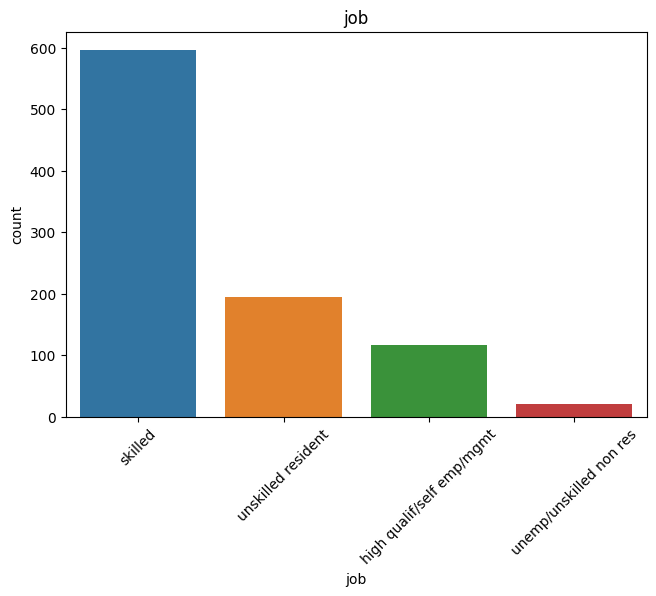

In [39]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'job', data = credit_customers)
plt.title('job')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'own_telephone')

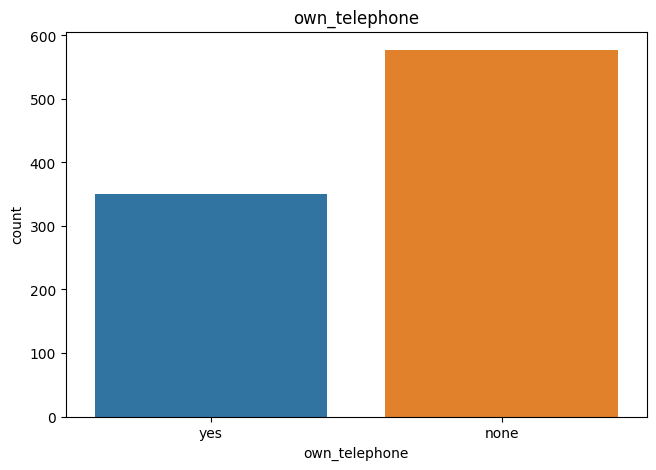

In [40]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'own_telephone', data = credit_customers)
plt.title('own_telephone')

Text(0.5, 1.0, 'foreign_worker')

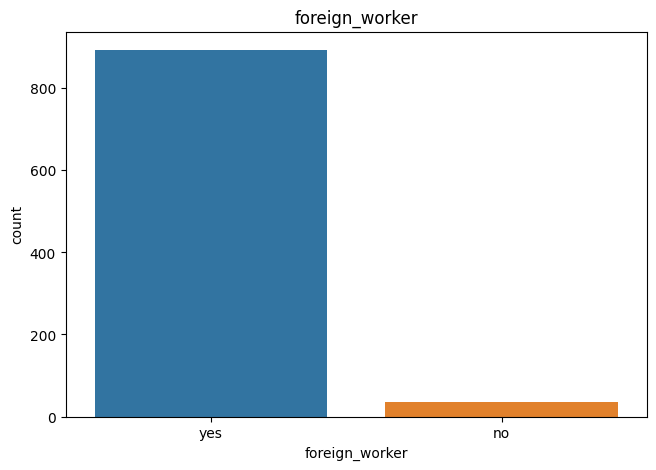

In [41]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'foreign_worker', data = credit_customers)
plt.title('foreign_worker')

### 3-2. 종속변수 y

Text(0.5, 1.0, 'class')

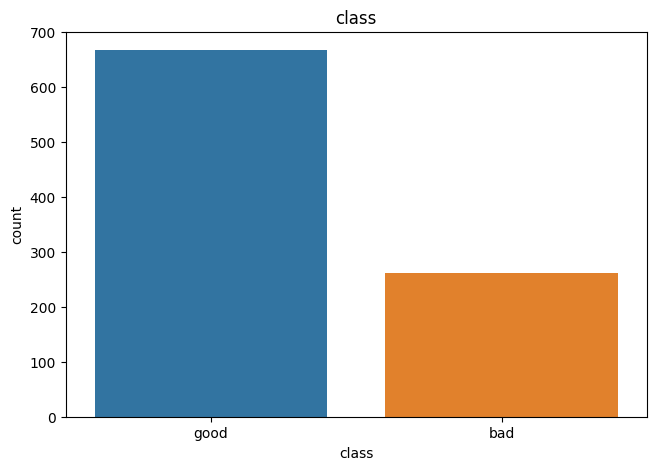

In [42]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'class', data = credit_customers)
plt.title('class')

### 3-3. 연속형

<Axes: xlabel='duration', ylabel='Density'>

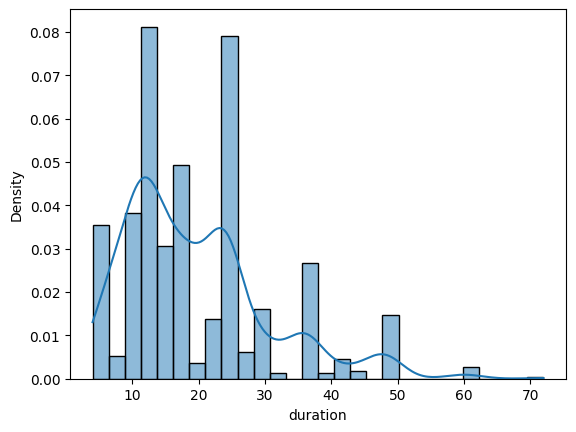

In [43]:
sns.histplot(credit_customers["duration"], kde=True, stat="density")

<Axes: xlabel='age', ylabel='Density'>

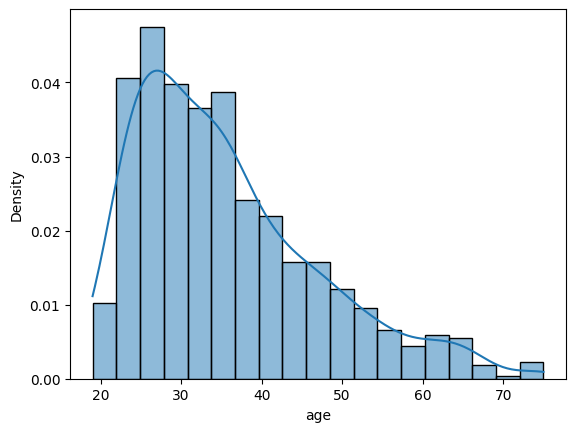

In [44]:
sns.histplot(credit_customers["age"], kde=True, stat="density")

<Axes: xlabel='credit_amount', ylabel='Density'>

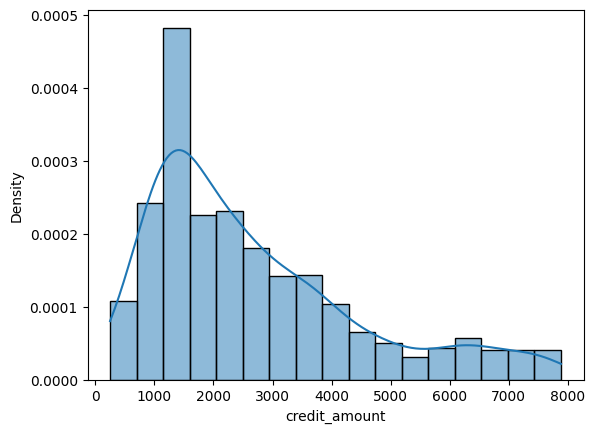

In [45]:
sns.histplot(credit_customers["credit_amount"], kde=True, stat="density")

<Axes: xlabel='installment_commitment', ylabel='Density'>

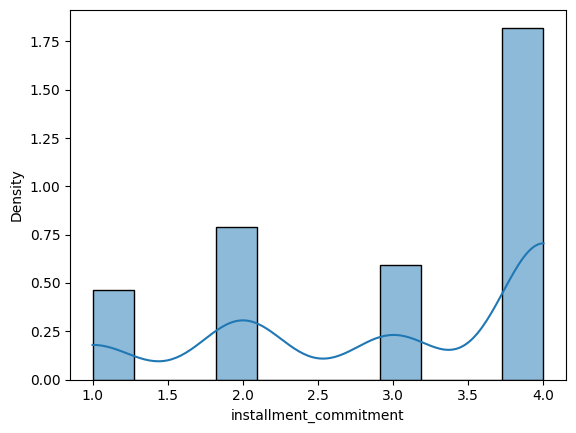

In [46]:
sns.histplot(credit_customers["installment_commitment"], kde=True, stat="density")

<Axes: xlabel='residence_since', ylabel='Density'>

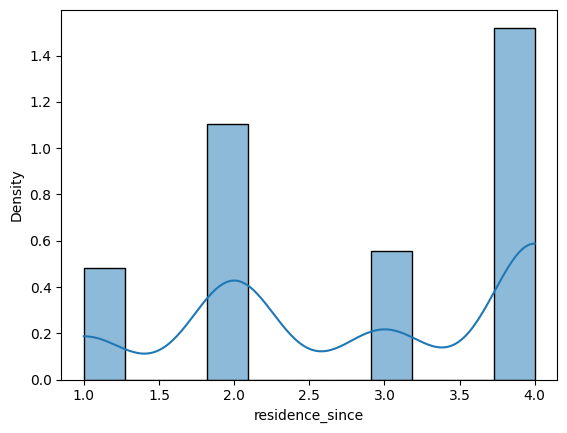

In [47]:
sns.histplot(credit_customers["residence_since"], kde=True, stat="density")

<Axes: xlabel='existing_credits', ylabel='Density'>

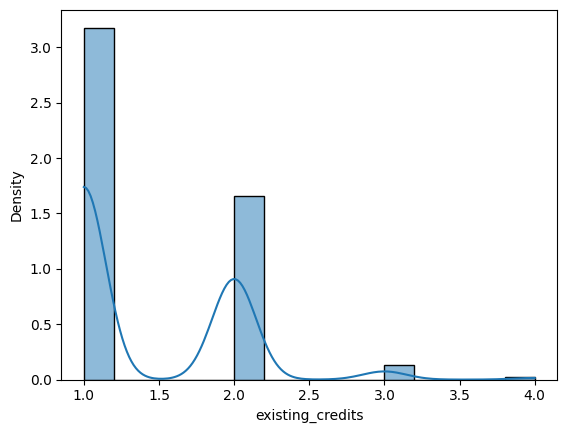

In [48]:
sns.histplot(credit_customers["existing_credits"], kde=True, stat="density")

<Axes: xlabel='num_dependents', ylabel='Density'>

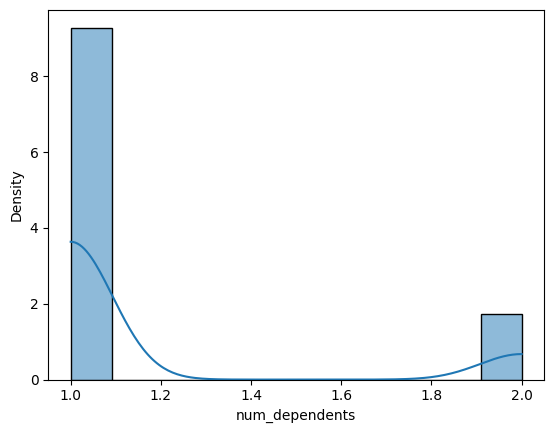

In [49]:
sns.histplot(credit_customers["num_dependents"], kde=True, stat="density")

### 3-4. 연속형 독립변수 상관관계

In [50]:
corr = credit_customers.corr(method = 'pearson')
corr

/var/folders/by/whxzj3ld0zz4d056gwdb3r380000gn/T/ipykernel_65015/2571273217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = credit_customers.corr(method = 'pearson')


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.582866,0.166389,0.054603,-0.038098,-0.017916,-0.019500
credit_amount,0.582866,1.000000,-0.240908,0.054719,0.041909,0.026100,0.057455
installment_commitment,0.166389,-0.240908,1.000000,0.042510,0.057500,0.027614,-0.078646
residence_since,0.054603,0.054719,0.042510,1.000000,0.267672,0.080012,0.039548
age,-0.038098,0.041909,0.057500,0.267672,1.000000,0.177529,0.121799
existing_credits,-0.017916,0.026100,0.027614,0.080012,0.177529,1.000000,0.107596
num_dependents,-0.019500,0.057455,-0.078646,0.039548,0.121799,0.107596,1.000000


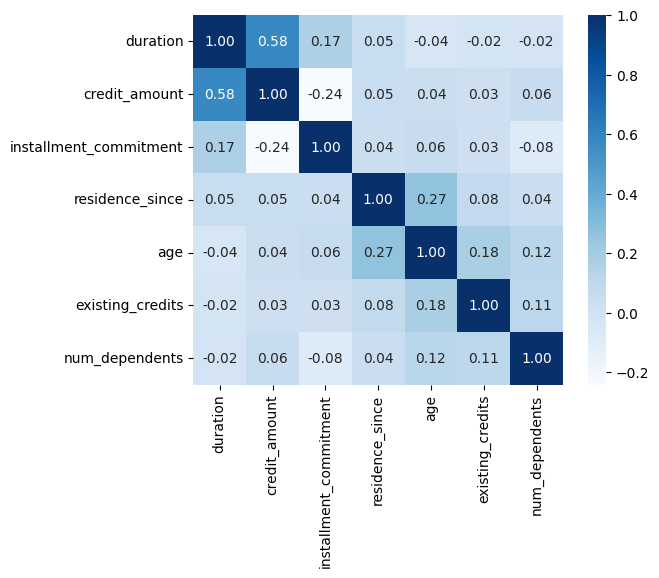

In [53]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


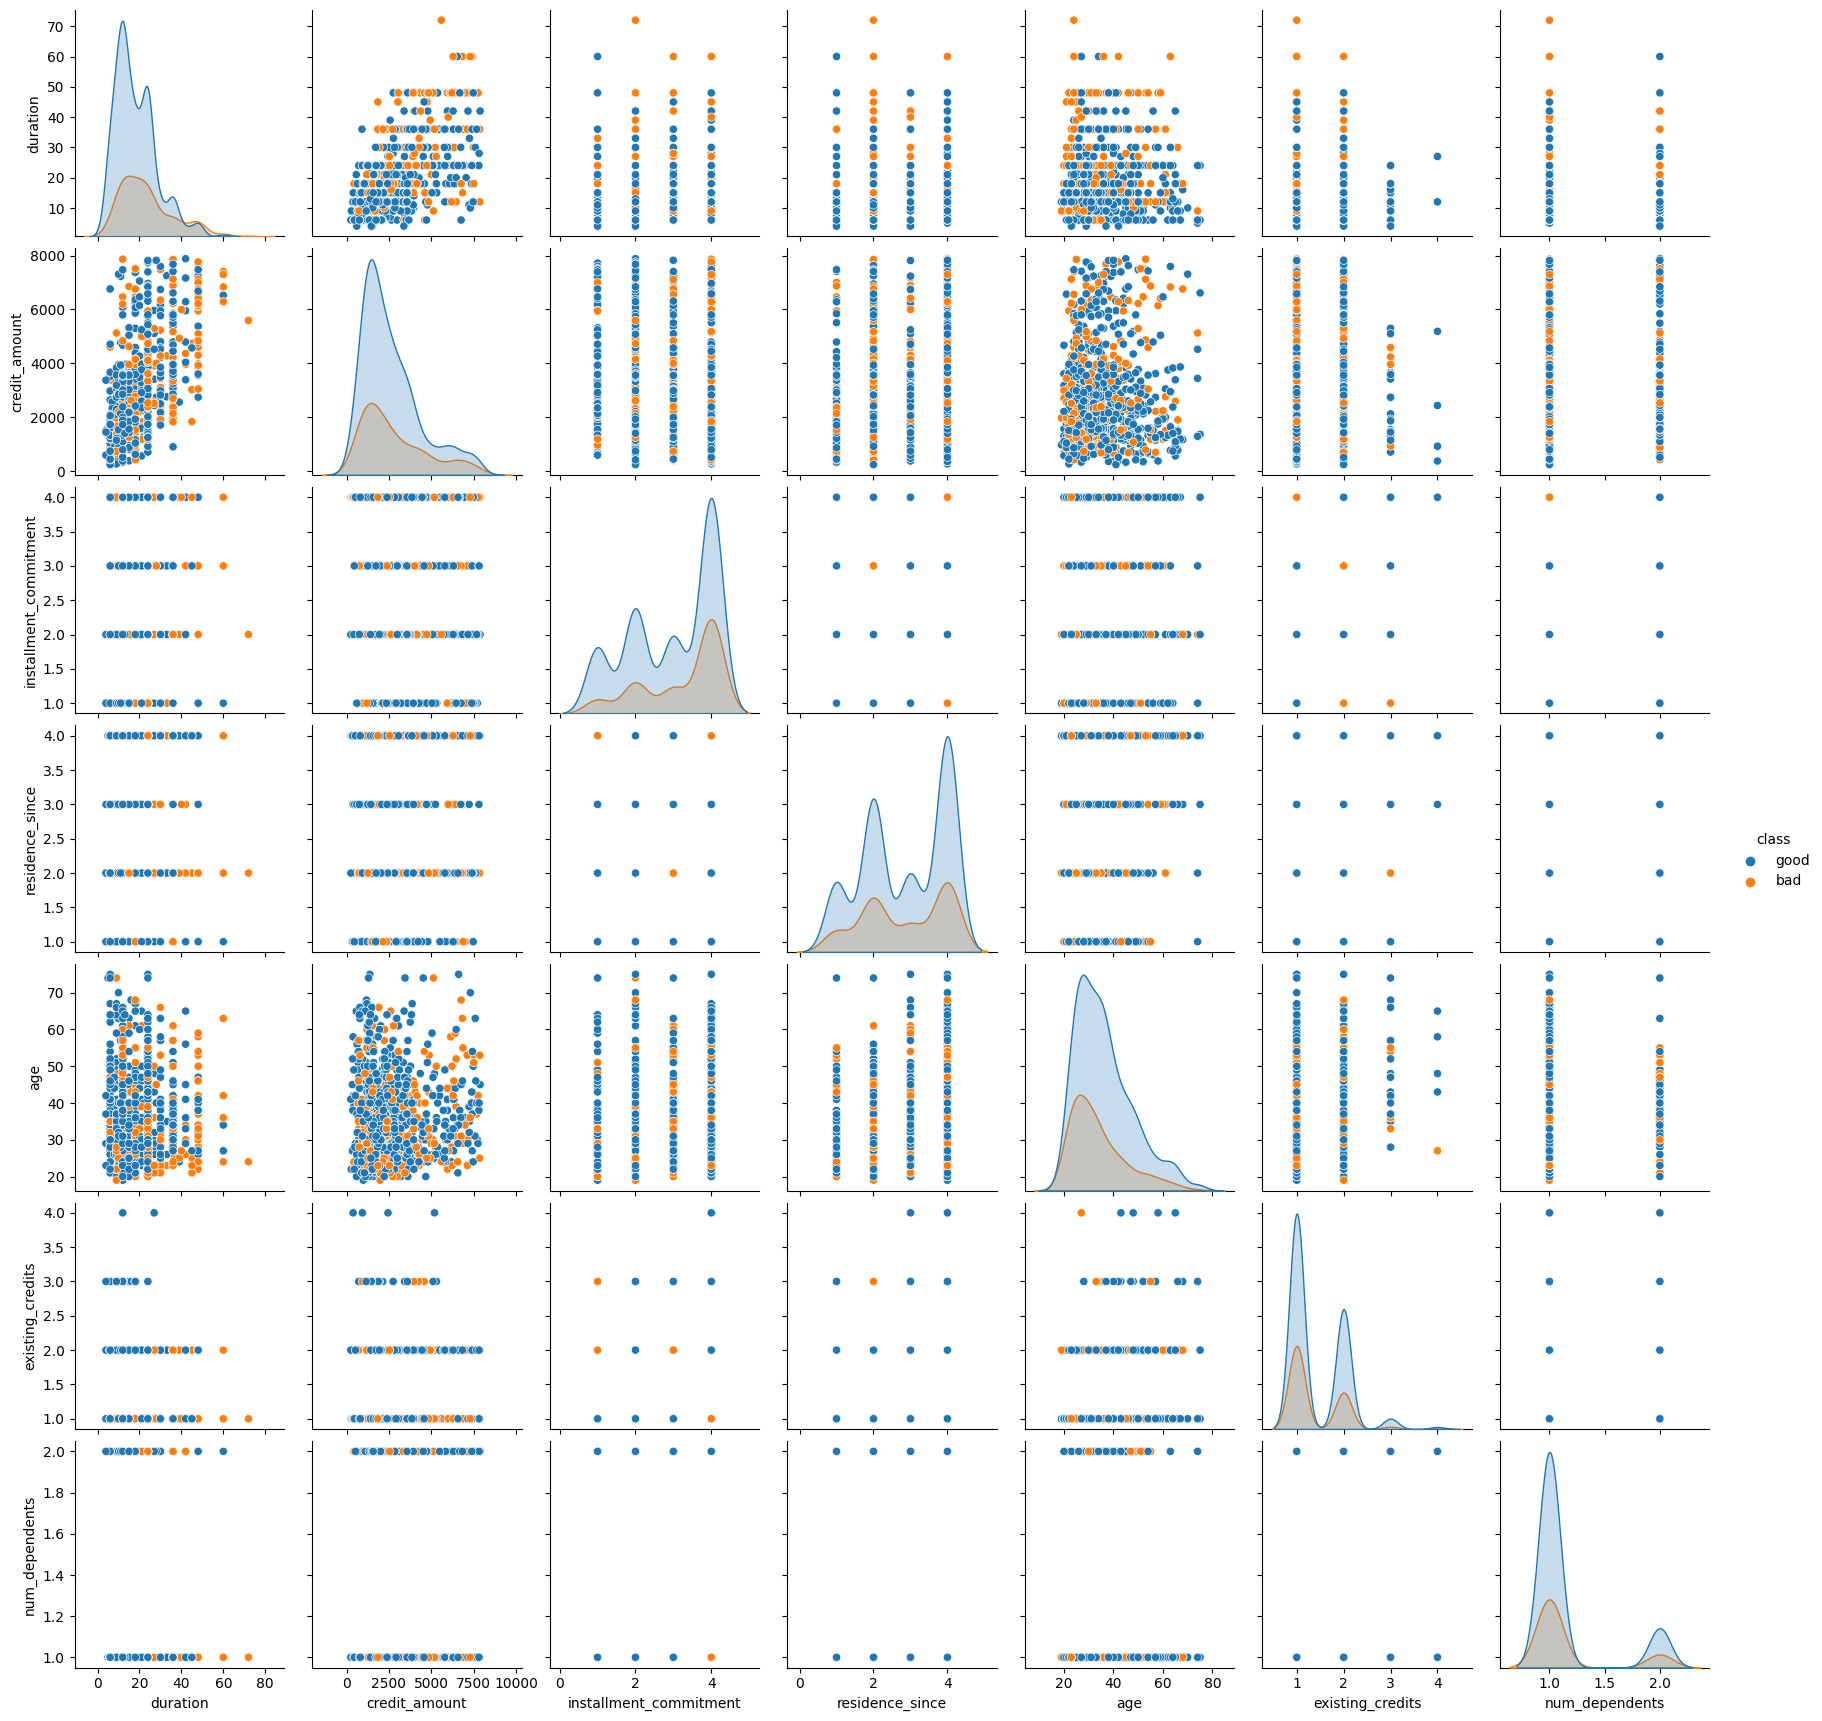

In [54]:
sns.pairplot(data=credit_customers,hue="class")
plt.show()
plt.close()

### 3-5. 결론
- 범주형 변수 : labelEncoder을 활용하여 변환
- 연속형 변수 -> 두 유형으로 분류 가능
    - duration, age, credit_amount : 값이 여러 개 -> MinMaxScaler 활용하여 정규화
    - installment_commitment, residence_since, existing_credits, num_dependents : 값이 일정 개수로 분류됨 -> 그대로 활용

## 4. 모델링

### 4-1. 모델링을 위한 전처리

In [55]:
from sklearn import preprocessing

In [56]:
label_encoder1 = preprocessing.LabelEncoder()
credit_customers['checking_status']= label_encoder1.fit_transform(credit_customers['checking_status'])

label_encoder2 = preprocessing.LabelEncoder()
credit_customers['credit_history']= label_encoder2.fit_transform(credit_customers['credit_history'])

label_encoder3 = preprocessing.LabelEncoder()
credit_customers['purpose']= label_encoder3.fit_transform(credit_customers['purpose'])

label_encoder4 = preprocessing.LabelEncoder()
credit_customers['savings_status']= label_encoder4.fit_transform(credit_customers['savings_status'])

label_encoder5 = preprocessing.LabelEncoder()
credit_customers['employment']= label_encoder5.fit_transform(credit_customers['employment'])

label_encoder6 = preprocessing.LabelEncoder()
credit_customers['personal_status']= label_encoder6.fit_transform(credit_customers['personal_status'])

label_encoder7 = preprocessing.LabelEncoder()
credit_customers['other_parties']= label_encoder7.fit_transform(credit_customers['other_parties'])

label_encoder8 = preprocessing.LabelEncoder()
credit_customers['property_magnitude']= label_encoder8.fit_transform(credit_customers['property_magnitude'])

label_encoder9 = preprocessing.LabelEncoder()
credit_customers['other_payment_plans']= label_encoder9.fit_transform(credit_customers['other_payment_plans'])

label_encoder10 = preprocessing.LabelEncoder()
credit_customers['housing']= label_encoder10.fit_transform(credit_customers['housing'])

label_encoder11 = preprocessing.LabelEncoder()
credit_customers['job']= label_encoder11.fit_transform(credit_customers['job'])

label_encoder12 = preprocessing.LabelEncoder()
credit_customers['own_telephone']= label_encoder12.fit_transform(credit_customers['own_telephone'])

label_encoder13 = preprocessing.LabelEncoder()
credit_customers['foreign_worker']= label_encoder13.fit_transform(credit_customers['foreign_worker'])

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(credit_customers[['duration', 'credit_amount', 'age']])
credit_customers[['duration', 'credit_amount', 'age']] = min_max_scaler.transform(credit_customers[['duration', 'credit_amount', 'age']])

In [83]:
credit_customers.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,0.029412,1,6,0.120414,4,3,4.0,3,2,4.0,3,0.857143,1,1,2.0,1,1.0,1,1,good
1,0,0.647059,3,6,0.746986,2,0,2.0,0,2,2.0,3,0.053571,1,1,1.0,1,1.0,0,1,bad
2,3,0.117647,1,2,0.241876,2,1,2.0,3,2,3.0,3,0.535714,1,1,1.0,3,2.0,0,1,good
3,1,0.558824,3,3,1.000000,2,1,2.0,3,1,4.0,1,0.464286,1,0,1.0,1,2.0,0,1,good
4,1,0.294118,2,4,0.605346,2,0,3.0,3,2,4.0,2,0.607143,1,0,2.0,1,2.0,0,1,bad


In [84]:
y= credit_customers.iloc[:,[-1]]
X= credit_customers.drop(y.columns,axis = 1)

### 4-2. 데이터 분할

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y['class'])

### 4-3. Logistic

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [88]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7598566308243727

### 4-4. Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [90]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6881720430107527

### 4-5. KNeighbors

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [92]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7204301075268817

### 4-6. SVM

In [93]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [94]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7240143369175627

### 4-7. Gaussian Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [96]:
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7598566308243727

### 4-8. RandomForest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [98]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/var/folders/by/whxzj3ld0zz4d056gwdb3r380000gn/T/ipykernel_65015/1161833418.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.8136200716845878

### 4-9. AdaBoost

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

In [100]:
ab.fit(X_train, y_train)
ab.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8100358422939068